In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [272]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [273]:
df.shape

(13320, 9)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Key Points in Dataset
1. 1 blank values in Location
2. Blank values in size
3. Lots of blank values in society
4. Total_sqft,bath,balcony,price are non int values. This should be changed to int or float
5. BHK & Bedromm keyword present in size feature


In [275]:
#Checking Null values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [276]:
#We will drop area_type,avilability,society & balcony features from the dataset
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [277]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


Since there is very less missing number of records in specific columns. We will directly impute as per the domain expertise.

In [279]:
df['location'].fillna('Sarjapur Road',inplace=True)
df['size'].fillna('2 BHK',inplace=True)
df['bath'].fillna(df['bath'].median(),inplace=True)

In [280]:
df['total_sqft'].unique() #We have to remove range values from total_sqft feature

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### Data Cleansing Process

In [281]:
def convertrange(x):
    if '-' in str(x):
        temp = x.split('-')
        return (float(temp[0])+float(temp[1]))/2
    else:
        return x
df['total_sqft'] = df['total_sqft'].apply(convertrange)

In [282]:
df['total_sqft'] = df['total_sqft'].str.replace('Sq. Meter','')
df['total_sqft'] = df['total_sqft'].str.replace('Perch','')
df['total_sqft'] = df['total_sqft'].str.replace('Acres','')
df['total_sqft'] = df['total_sqft'].str.replace('Guntha','')
df['total_sqft'] = df['total_sqft'].str.replace('Grounds','')
df['total_sqft'] = df['total_sqft'].str.replace('Sq. Yards','')
df['total_sqft'] = df['total_sqft'].str.replace('Guntha','')
df['total_sqft'] = df['total_sqft'].str.replace('Cents','')
df['size'] = df['size'].str.replace('BHK','')
df['size'] = df['size'].str.replace('RK','')
df['size'] = df['size'].str.replace('Bedroom','')

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [283]:
df['size'] = df['size'].astype(int)
df['total_sqft'] = df['total_sqft'].astype(float)
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())
df['bath'] = df['bath'].astype(float)
df['price'] = df['price'].astype(float)


In [284]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


##### Creating New Columns based on business understanding

In [285]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [286]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.802778,1551.247469,2.688814,112.565627,1.236999e+04
std,1.294496,1229.565164,1.338754,148.971674,2.256400e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.252220e+03
50%,3.000000,1281.000000,2.000000,72.000000,5.449100e+03
75%,3.000000,1656.750000,3.000000,120.000000,7.381550e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.600000e+07


In [287]:
df['location'] = df['location'].apply(lambda x: x.strip())
df['location'].value_counts()

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

We can see that there are total 1295 unique values in the location feature. On this we can not do one hot encoding so instead of those features who has count less than 10 will change to Others

In [288]:
dict_ = dict(df['location'].value_counts())
def ConvertLocation_Others(x):
    if dict_[x]<=10:
        return 'Others'
    else:
        return x
    
dict_ = dict(df['location'].value_counts())
df['location'] = df['location'].apply(ConvertLocation_Others)

In [289]:
df['location'].value_counts()

Others                2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

### Outliers Detection & removal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('CleanedData.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


#### Removing outliers from Total Sqft column

In [3]:
df = df[((df['total_sqft']/df['size'])>=300)]

In [4]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,12538.000000,12538.000000,12538.000000,12538.000000,12538.000000
mean,2.651460,1589.834574,2.560217,111.390611,6332.088388
std,0.978385,1251.631816,1.079405,152.041719,4235.680087
min,1.000000,300.000000,1.000000,8.440000,267.829813
25%,2.000000,1125.000000,2.000000,49.000000,4199.413783
50%,3.000000,1308.000000,2.000000,70.000000,5295.950156
75%,3.000000,1693.000000,3.000000,115.000000,6948.640483
max,16.000000,52272.000000,16.000000,3600.000000,176470.588235


#### Removing outliers from Price, BHK features

In [5]:
lbound = df['price'].mean() - 3*df['price'].std()
rbound = df['price'].mean() + 3*df['price'].std()

In [6]:
rbound

567.5157681088165

In [7]:
df.drop(columns=['price_per_sqft'],axis=1,inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='price', ylabel='Density'>

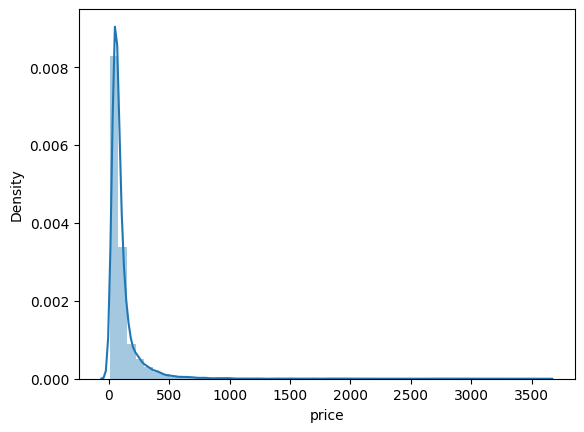

In [8]:
import seaborn as sns
sns.distplot(a=df['price'])

### Model Building & Evaluation

In [9]:
ndf = df.copy()

In [10]:
ohdf = pd.get_dummies(df['location'],drop_first=True)
ndf = df.drop(columns=['location'])
ndf = pd.concat([ohdf,ndf],axis=1)
ndf.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,size,total_sqft,bath,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1056.0,2.0,39.07
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,2600.0,5.0,120.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1440.0,2.0,62.00
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1521.0,3.0,95.00
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1200.0,2.0,51.00


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = ndf.iloc[0:,0:-1]
y = ndf.iloc[0:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

X = ndf.iloc[0:,0:-1]
y = ndf.iloc[0:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

models_name = {
    'LR':LinearRegression(),
    'RFR':RandomForestRegressor(),
    'DTR':DecisionTreeRegressor(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()
}


params_dict = {
    'LR':{'fit_intercept':[True,False],
         'copy_X':[True,False],
         'positive':[True,False]},
    'RFR':{'n_estimators':[10,20,30,50,80],
          'criterion':['squared_error','absolute_error'],'max_depth':[2,5,6,8],'min_samples_split':[2,5,6,8],
          'min_samples_leaf':[2,5,6,8],'bootstrap':[True,False]},
#     'DTR':{
#           'splitter':['best','random'],
#           'max_depth':[2,5,6,8],
#           'min_samples_split':[2,5,6,8],
#           'min_samples_leaf':[2,5,6,8],
#           'max_features':[2,5],
#           'max_leaf_nodes':[2,5,6,8]},
    'Lasso':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8],'selection':['cyclic','random']},
    'Ridge':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8]},
    'ElasticNet':{'alpha':[0.3,0.5,0.8,1,1.5],'fit_intercept':[True,False],'copy_X':[True,False],
            'max_iter':[2,5,6,8],'selection':['cyclic','random']}
}

from sklearn.model_selection import RandomizedSearchCV
Model_List = []
Accuracy_Score = []
Best_Parameters = []
for key,value in models_name.items():
    Model_Parameters = params_dict[key]
    grid = RandomizedSearchCV(value , param_distributions=Model_Parameters, cv=5, return_train_score=False,error_score='raise',n_jobs=-1)
    print(key,'Grid Serach has been completed')
    grid.fit(X_train_scaled,y_train)
    print(key,'Grid has been fit on X_train & y_train')
    Model_List.append(key)
    Accuracy_Score.append(grid.best_score_)
    Best_Parameters.append(grid.best_params_)
    print(key, 'model has been completed!')


#Main_list = [Model_List,Accuracy_Score,Best_Parameters]
Result_df = pd.DataFrame({'Model Name':Model_List,'Accuracy':Accuracy_Score,
                          'Best Parameters':Best_Parameters})
print('Done')

LR Grid Serach has been completed


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


LR Grid has been fit on X_train & y_train
LR model has been completed!
RFR Grid Serach has been completed
